In [1]:
from nal.truth import TruthValue
from object.layer import Layer, visualize_layers, Link
from tqdm import tqdm
import numpy as np

In [2]:
tv1 = TruthValue(1.0, 0.5)
tv2 = TruthValue(0.0, 0.5)
tv1.revise(tv2)
print(tv1)

(0.50;0.67)


In [3]:
import torch
import torchvision

import torchvision.transforms as transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor()])

# Download and load the training data
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# Print the size of the training and test datasets
print(f'Training dataset size: {len(trainset)}')
print(f'Test dataset size: {len(testset)}')

Training dataset size: 60000
Test dataset size: 10000


In [4]:
# Get the first batch of images and labels
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Get the first image and its label
first_image = images[0]
first_label = labels[0]

print(first_image.shape)
print(first_label)

torch.Size([1, 28, 28])
tensor(6)


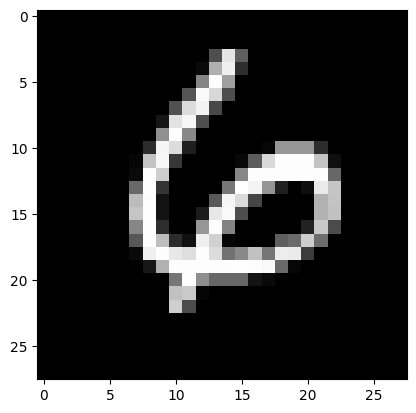

In [5]:
import matplotlib.pyplot as plt

plt.imshow(first_image.numpy().squeeze(), cmap='gray')

In [6]:
first_image.view(-1).numpy().shape

(784,)

In [7]:
values = [(v, 0.9) for v in first_image.view(-1).numpy()]

In [8]:
first_label

tensor(6)

In [9]:
label = [(1.0, 0.99) if i == first_label else (0.0, 0.99) for i in range(10)]
print(label)

[(0.0, 0.99), (0.0, 0.99), (0.0, 0.99), (0.0, 0.99), (0.0, 0.99), (0.0, 0.99), (1.0, 0.99), (0.0, 0.99), (0.0, 0.99), (0.0, 0.99)]


In [36]:
class Net:
    def __init__(self, n_input, n_hidden, n_output):
        self.input_layer = Layer(n_input)
        self.hidden_layer = Layer(n_hidden)
        # self.output_layer = Layer(n_output)
        self.input_layer.fully_connect(self.hidden_layer)
        self.layers = [self.input_layer, self.hidden_layer]
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_output = n_output

    def init_truth_values(self):
        fs = np.random.rand(28*28, 10)
        cs = np.random.rand(28*28, 10)*0.3
        weights_1_out = np.array((fs, cs)).transpose(1, 2, 0)
        print(weights_1_out.shape)
        self.input_layer.set_weights(weights_1_out)

    def clean_layers(self):
        for layer in self.layers:
            layer.clean()

    def forward(self, values):
        self.clean_layers()
        self.input_layer.input(values)
        self.input_layer.forward()
        truthv_out = [node.truth_value.e for node in self.hidden_layer.nodes]
        label = np.argmax(truthv_out)
        label = [(1.0, 0.99) if i == label else (0.0, 0.99) for i in range(self.n_hidden)]
        self.hidden_layer.input_back(label)
        
    def backprop(self):
        self.hidden_layer.backprop()

    def forget(self):
        for node in self.hidden_layer.nodes:
            for link in node.lower_links:
                link.truth_value.c = min(link.truth_value.c, 0.9)



In [37]:
net = Net(28*28, 32, 10)

In [38]:
total = 30
acc_all = []
for i, (images, labels) in enumerate(trainloader):
    # acc = test()
    # acc_all.append(acc)
    # print(f'iter {i}: acc: {acc}')
    print(f"{i} / {total}")
    for image, label in tqdm(zip(images, labels), total=len(images)):
        values = [(v, 0.9) for v in image.view(-1).numpy()]
        label = [(1.0, 0.99) if i == label else (0.0, 0.99) for i in range(10)]
        net.clean_layers()
        net.forward(values)
        net.backprop()
        # print(truthv_out)
    net.forget()
    if i > total:
        break
# acc = test()
# acc_all.append(acc)

0 / 30


100%|██████████| 64/64 [00:11<00:00,  5.69it/s]


1 / 30


100%|██████████| 64/64 [00:12<00:00,  5.24it/s]


2 / 30


100%|██████████| 64/64 [00:12<00:00,  5.19it/s]


3 / 30


100%|██████████| 64/64 [00:12<00:00,  5.14it/s]


4 / 30


100%|██████████| 64/64 [00:12<00:00,  5.11it/s]


5 / 30


100%|██████████| 64/64 [00:12<00:00,  5.12it/s]


6 / 30


100%|██████████| 64/64 [00:12<00:00,  5.06it/s]


7 / 30


100%|██████████| 64/64 [00:12<00:00,  5.06it/s]


8 / 30


100%|██████████| 64/64 [00:12<00:00,  5.06it/s]


9 / 30


100%|██████████| 64/64 [00:12<00:00,  5.09it/s]


10 / 30


100%|██████████| 64/64 [00:12<00:00,  4.94it/s]


11 / 30


100%|██████████| 64/64 [00:12<00:00,  5.05it/s]


12 / 30


100%|██████████| 64/64 [00:12<00:00,  5.13it/s]


13 / 30


100%|██████████| 64/64 [00:12<00:00,  5.15it/s]


14 / 30


100%|██████████| 64/64 [00:12<00:00,  5.06it/s]


15 / 30


100%|██████████| 64/64 [00:12<00:00,  5.00it/s]


16 / 30


100%|██████████| 64/64 [00:12<00:00,  5.05it/s]


17 / 30


100%|██████████| 64/64 [00:12<00:00,  5.01it/s]


18 / 30


100%|██████████| 64/64 [00:12<00:00,  5.01it/s]


19 / 30


100%|██████████| 64/64 [00:12<00:00,  5.00it/s]


20 / 30


100%|██████████| 64/64 [00:12<00:00,  5.02it/s]


21 / 30


100%|██████████| 64/64 [00:12<00:00,  5.03it/s]


22 / 30


100%|██████████| 64/64 [00:12<00:00,  5.00it/s]


23 / 30


100%|██████████| 64/64 [00:12<00:00,  5.02it/s]


24 / 30


100%|██████████| 64/64 [00:12<00:00,  5.03it/s]


25 / 30


100%|██████████| 64/64 [00:12<00:00,  5.10it/s]


26 / 30


100%|██████████| 64/64 [00:12<00:00,  5.02it/s]


27 / 30


100%|██████████| 64/64 [00:12<00:00,  5.17it/s]


28 / 30


100%|██████████| 64/64 [00:12<00:00,  5.04it/s]


29 / 30


100%|██████████| 64/64 [00:12<00:00,  5.00it/s]


30 / 30


100%|██████████| 64/64 [00:12<00:00,  5.06it/s]


31 / 30


100%|██████████| 64/64 [00:12<00:00,  5.06it/s]


In [ ]:
# [node.truth_value.e for node in layer_out.nodes]


In [39]:
tvs_all = []
for node in net.hidden_layer.nodes:
    tvs = []
    link: Link
    for link in node.lower_links:
        # tvs.append((link.truth_value.f, link.truth_value.c))
        tvs.append(link.truth_value.e)
    tvs_all.append(tvs)


In [40]:
tvs_all = np.array(tvs_all)

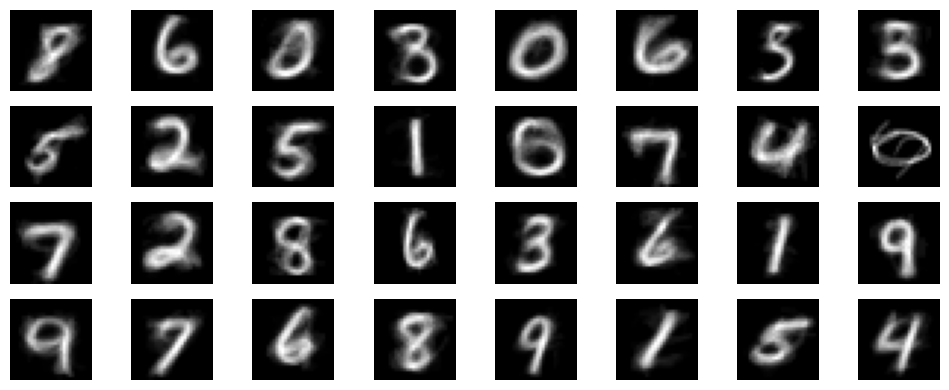

In [41]:
tvs_all = tvs_all.reshape(32, 28, 28)
import matplotlib.pyplot as plt

# 显示这 10 张图片
fig, axes = plt.subplots(4, 8, figsize=(10, 4))  # 创建2行5列的子图
axes = axes.flatten()

for i in range(32):
    axes[i].imshow(tvs_all[i], cmap='gray')  # 显示灰度图
    axes[i].axis('off')  # 关闭坐标轴

plt.tight_layout()
plt.show()


In [42]:
tvs_all[0].max()

0.8480415151490933

## 测试精度
用SVM进行线性分类

In [43]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

#### 获取hidden layer的输出

In [44]:
# 构造数据集
total = 10
X_train = []
y_train = []
for i, (images, labels) in enumerate(trainloader):
    for image, label in tqdm(zip(images, labels), total=len(images)):
        values = [(v, 0.9) for v in image.view(-1).numpy()]
        net.forward(values)
        truthv_out = [node.truth_value.e for node in net.hidden_layer.nodes]
        X_train.append(truthv_out)
        y_train.append(label)
    if i > total:
        break


100%|██████████| 64/64 [00:05<00:00, 12.59it/s]


In [45]:

X_test = []
y_test = []
for i, (images, labels) in enumerate(testloader):
    for image, label in tqdm(zip(images, labels), total=len(images)):
        values = [(v, 0.9) for v in image.view(-1).numpy()]
        net.forward(values)
        truthv_out = [node.truth_value.e for node in net.hidden_layer.nodes]
        X_test.append(truthv_out)
        y_test.append(label)
    if i > total:
        break
        

100%|██████████| 64/64 [00:05<00:00, 12.48it/s]


In [46]:
model = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True))
model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear', probability=True))])

In [47]:
y_pred = model.predict(X_test)

In [48]:
sum(y_pred == np.array(y_test)) / len(y_test)

0.8880208333333334

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        76
           1       0.94      0.98      0.96       103
           2       0.86      0.86      0.86        91
           3       0.82      0.83      0.82        76
           4       0.86      0.86      0.86        72
           5       0.81      0.85      0.83        54
           6       0.91      0.93      0.92        75
           7       0.91      0.91      0.91        65
           8       0.87      0.83      0.85        71
           9       0.93      0.84      0.88        85

    accuracy                           0.89       768
   macro avg       0.88      0.88      0.88       768
weighted avg       0.89      0.89      0.89       768

